In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [19]:
data3 = pd.read_csv("CMCSA (1).csv")
data4 = pd.read_csv("CMCSA (2).csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [20]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,27.410000,27.760000,26.170000,27.665001,25.346252,120174800
1,2016-01-25,27.540001,27.924999,26.809999,27.855000,25.520325,141146600
2,2016-02-01,27.535000,29.735001,27.190001,29.705000,27.215273,214506200
3,2016-02-08,29.580000,29.850000,27.350000,28.389999,26.010492,195029600
4,2016-02-15,28.905001,29.155001,28.295000,28.879999,26.459417,93346800


In [21]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,52.942759,50.592072,55.353285
433,2020-08-25,52.986415,50.407344,55.266992
434,2020-08-26,53.026741,50.383379,55.338509
435,2020-08-27,53.063422,50.659913,55.496992
436,2020-08-28,53.096213,50.473149,55.512709


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

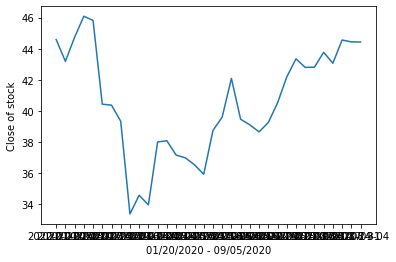

In [23]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

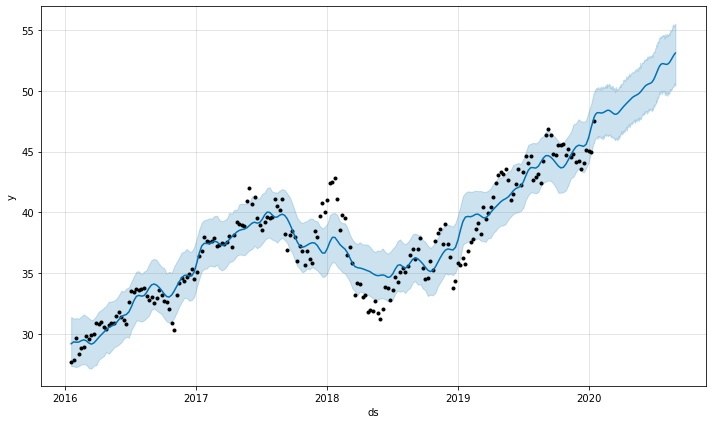

In [24]:
fig1 = m4.plot(forecast)

In [25]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,42.560001,44.180000,42.560001,43.770000,43.770000,71810700
30,2020-08-17,43.869999,43.950001,42.720001,43.070000,43.070000,55158600
31,2020-08-24,42.860001,44.799999,42.849998,44.560001,44.560001,63400500
32,2020-08-31,44.259998,45.939999,44.090000,44.439999,44.439999,80769300
33,2020-09-04,44.910000,44.970001,43.902000,44.430000,44.430000,15911139


In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,52.167570,50.592072,55.353285,50.845750,53.488010,0.775189,0.775189,0.775189,0.775189,0.775189,0.775189,0.0,0.0,0.0,52.942759
433,2020-08-25,52.190921,50.407344,55.266992,50.857827,53.519167,0.795495,0.795495,0.795495,0.795495,0.795495,0.795495,0.0,0.0,0.0,52.986415
434,2020-08-26,52.214271,50.383379,55.338509,50.870473,53.553012,0.812470,0.812470,0.812470,0.812470,0.812470,0.812470,0.0,0.0,0.0,53.026741
435,2020-08-27,52.237622,50.659913,55.496992,50.883120,53.583723,0.825801,0.825801,0.825801,0.825801,0.825801,0.825801,0.0,0.0,0.0,53.063422
436,2020-08-28,52.260972,50.473149,55.512709,50.895767,53.617469,0.835241,0.835241,0.835241,0.835241,0.835241,0.835241,0.0,0.0,0.0,53.096213


In [1]:
adobe_impact = (44.430000 - 53.096213)/53.096213 * 100
print("Comcast's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", adobe_impact, "% as of 09/05/2020")

Comcast's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 -16.32171582557121 % as of 09/05/2020
